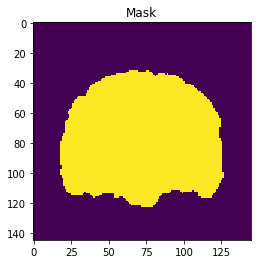

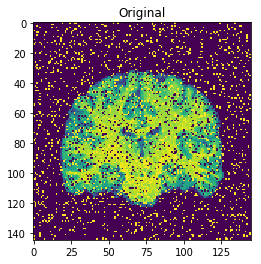

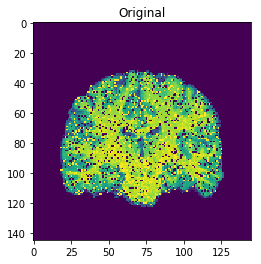

In [2]:
# 2nd

import imageio
import matplotlib.pyplot as plt
import numpy as np

#from scipy import signal

img = imageio.imread('brain-noisy.png')
mask = imageio.imread('mask.png')

plt.imshow(mask)
plt.title("Mask")
plt.show()

plt.imshow(img)
plt.title("Original")
plt.show()

la = np.ma.minimum(mask, img)

plt.imshow(la)
plt.title("Original")
plt.show()


(145, 145, 3)


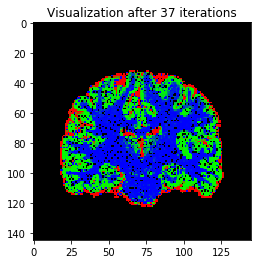

In [35]:
%%time
from math import pi, sqrt, exp

def nx(x, mu, sigma):
    result = -(x- mu)**2
    result /= 2*(sigma**2)
    return exp(result)/(sqrt(2*pi)*sigma)

    
def e_step(data, mu, sigma, pi_, K):
    result= np.zeros((data.shape[0], data.shape[1], K), dtype=float)
    for i, line in enumerate(data):
        for j, v in enumerate(line):
            den = 0
            if v:
                for k in range(K):
                    result[i,j][k] = nx(v, mu[k], sigma[k])*pi_[k]
                    den+= result[i,j][k]
                for k in range(K):
                    result[i,j][k] /= den
    return result

def m_step(resp, data, K):
    Nk = np.sum(resp, axis=(0,1))
    #print(resp.shape, data.shape)
    mu = [0]*K
    for k in range(K):
        for i, line in enumerate(data):
            for j, val in enumerate(line):
                if val:
                    mu[k] += val*resp[i, j, k]
        mu[k]/=Nk[k]
    sigma = [0]*K
    for k in range(K):
        for i, line in enumerate(data):
            for j, val in enumerate(line):
                if val:
                    sigma[k] += resp[i, j, k]*((val-mu[k])**2)
        sigma[k]= sqrt(sigma[k]/Nk[k])
    n=np.count_nonzero(data)
    pi_= [x/n for x in Nk]
    return (mu, sigma, pi_)

def em_algorithm(data, k):
    #initialize
    mu=[10, 110, 240]
    sigma=[5]*k
    z=np.zeros((data.shape[0], data.shape[1], k), dtype=float)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if 0<data[i,j]<105: z[i,j,0]=1 
            if 105<=data[i,j]<210: z[i,j,1]=1 
            if data[i,j]>=210: z[i,j,2]=1
    pi_ = np.average(z, axis=(0,1))
    resp = e_step(data, mu, sigma, pi_, k)
    mu, sigma, pi_ = m_step(resp, data, k)
    resp = e_step(data, mu, sigma, pi_, k)

    return resp



rep=1
def em_algorithm(data, k):
    global rep
    #initialize
    mu=[10, 110, 240]
    oldmu=[0]*k
    sigma=[5]*k
    olds =[0]*k
    z=np.zeros((data.shape[0], data.shape[1], k), dtype=float)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if 0<data[i,j]<155: z[i,j,0]=1 
            if 155<=data[i,j]<200: z[i,j,1]=1 
            if data[i,j]>=200: z[i,j,2]=1
    pi_ = np.average(z, axis=(0,1))
    resp = e_step(data, mu, sigma, pi_, k)
    while True:
        mu, sigma, pi_ = m_step(resp, data, k)
        cond = [abs(x[0]-x[1])>0.1 and abs(x[2]-x[3])>0.1 for x in zip(mu, oldmu, sigma, olds)]
        if np.any(cond):
            rep+=1
            oldmu=mu
            olds=sigma
        else:
            break
        resp = e_step(data, mu, sigma, pi_, k)
    return resp

c=em_algorithm(la, 3)
plt.imshow(c)
plt.title("Visualization after "+ str(rep)+ " iterations")
plt.show()


[0. 0. 1.]


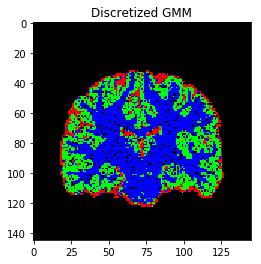

In [49]:

def discretizing(matrix):
    result = np.zeros_like(matrix)
    for i, line in enumerate(matrix):
        for j, rgb in enumerate(line):
            if sum(rgb):
                result[i,j] = [x==max(rgb) for x in rgb]
    return result

a= discretizing(c)
a.shape
plt.imshow(a)

plt.title("Discretized GMM")
plt.show()


In [50]:
def oneiterationICM(image):
    # initialize the parameters
    # for each voxel
    for voxels in image:
        # Condition on all the neighbors (treat them as fixed)
        # Pick the label that minimizes the energy
        pass
    

6.710368977828188

7.38905609893065